<a href="https://colab.research.google.com/github/FabioRagosta/Exercise_ML/blob/main/LezioneGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gaussian Process**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
workdir = '/content/drive/MyDrive/cartella condivisa pc-ufficio/Lezioni corso astroinformatica/'
import os
os.chdir(workdir)
params = {'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 17,
          'xtick.major.width': 1.5,
          'xtick.minor.width': 1,
          'xtick.major.size': 6,
          'xtick.minor.size': 3,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 1.5,
          'axes.linewidth': 1.5,
          'axes.labelweight': 1.5,
          'axes.titleweight': 1.5,
          'ytick.major.width': 1.5,
          'ytick.minor.width': 1,
          'ytick.major.size': 6,
          'ytick.minor.size': 3,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [8, 8],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

Mounted at /content/drive/


Before we can explore Gaussian processes, we need to understand the mathematical concepts they are based on. As the name suggests, the Gaussian distribution (which is often also referred to as normal distribution) is the basic building block of Gaussian processes. In particular, we are interested in the multivariate case of this distribution, where each random variable is distributed normally and their joint distribution is also Gaussian. The multivariate Gaussian distribution is defined by a mean vector
μ and a covariance matrix Σ.

The mean vector μ describes the expected value of the distribution. Each of its components describes the mean of the corresponding dimension.
Σ models the variance along each dimension and determines how the different random variables are correlated. The covariance matrix is always symmetric and positive semi-definite. The diagonal of Σ consists of the variance $σ^2_i$ of the i-th random variable. And the off-diagonal elements
$σ^2_{ij}$ describe the correlation between the
i-th and  j-th random variable.

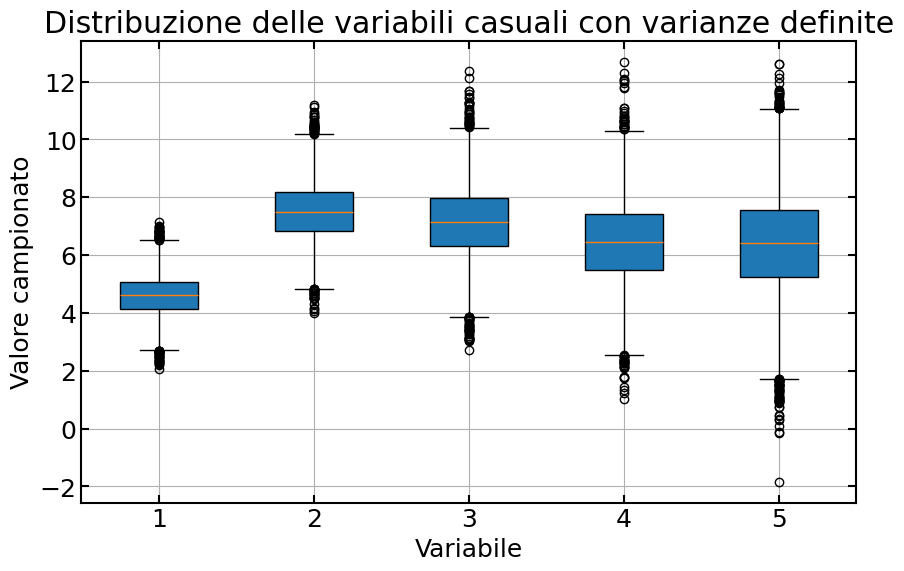

In [ ]:
# Numero di variabili
n = 5

# Media di ciascuna variabile (può essere zero)
mean = np.random.random(n)*10

# Varianze delle variabili
variances = np.array([0.5, 1.0, 1.5, 2.0, 3.0])

# Costruzione della matrice di covarianza (solo varianze sulla diagonale)
cov_matrix_indipendent = np.diag(variances)

cov_matrix_dipendent = np.random.random((n,n))*5

# Campionamento: 1000 campioni da una distribuzione normale multivariata
samples = np.random.multivariate_normal(mean, cov_matrix_indipendent, size=10000)

# Visualizzazione
plt.figure(figsize=(10, 6))
plt.boxplot(samples, vert=True, patch_artist=True)
plt.title('Distribuzione delle variabili casuali con varianze definite')
plt.xlabel('Variabile')
plt.ylabel('Valore campionato')
plt.grid(True)
plt.show()

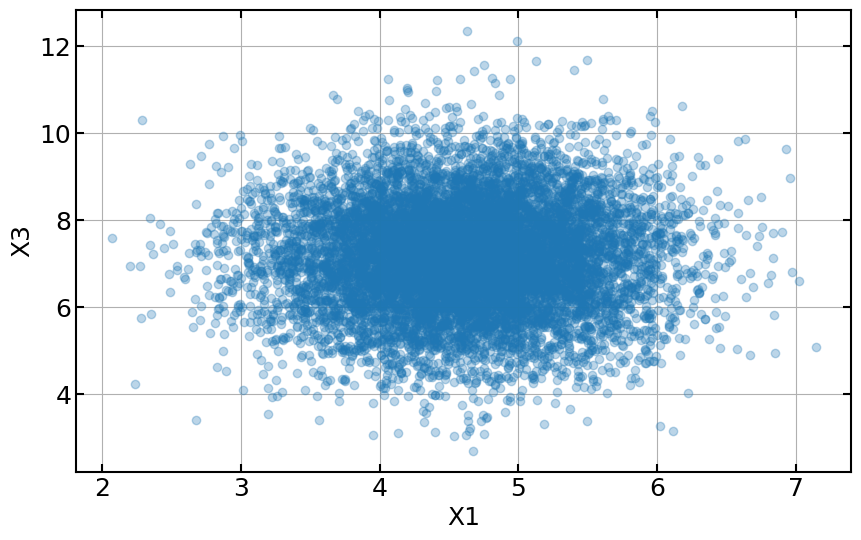

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(samples[:,0], samples[:,2],'o', alpha = 0.3)
plt.xlabel('X1')
plt.ylabel('X3')
plt.grid(True)
plt.show()

<ipython-input-4-f3b3cb78c8b7>:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_ = np.random.multivariate_normal(mean, cov_matrix_dipendent, size=10000)


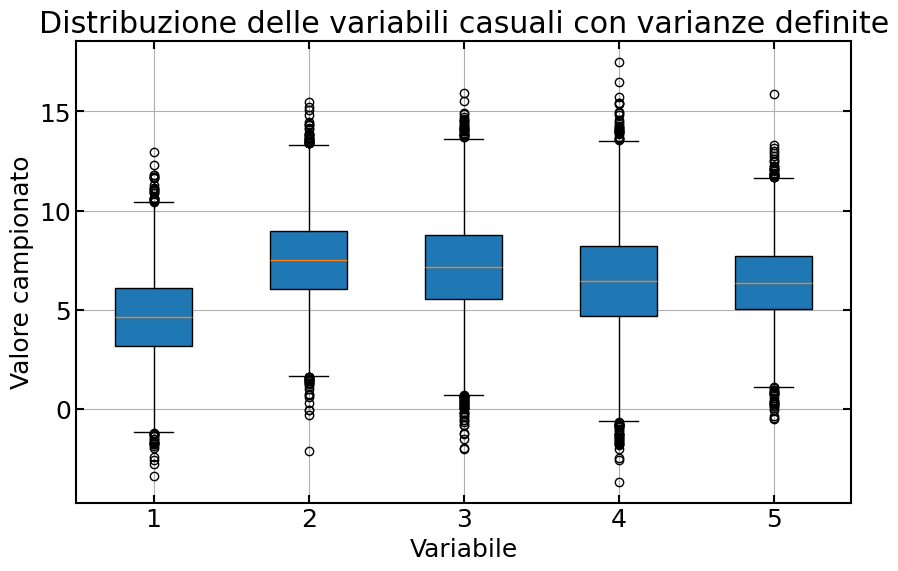

In [ ]:
samples_ = np.random.multivariate_normal(mean, cov_matrix_dipendent, size=10000)
# Visualizzazione
plt.figure(figsize=(10, 6))
plt.boxplot(samples_, vert=True, patch_artist=True)
plt.title('Distribuzione delle variabili casuali con varianze definite')
plt.xlabel('Variabile')
plt.ylabel('Valore campionato')
plt.grid(True)
plt.show()

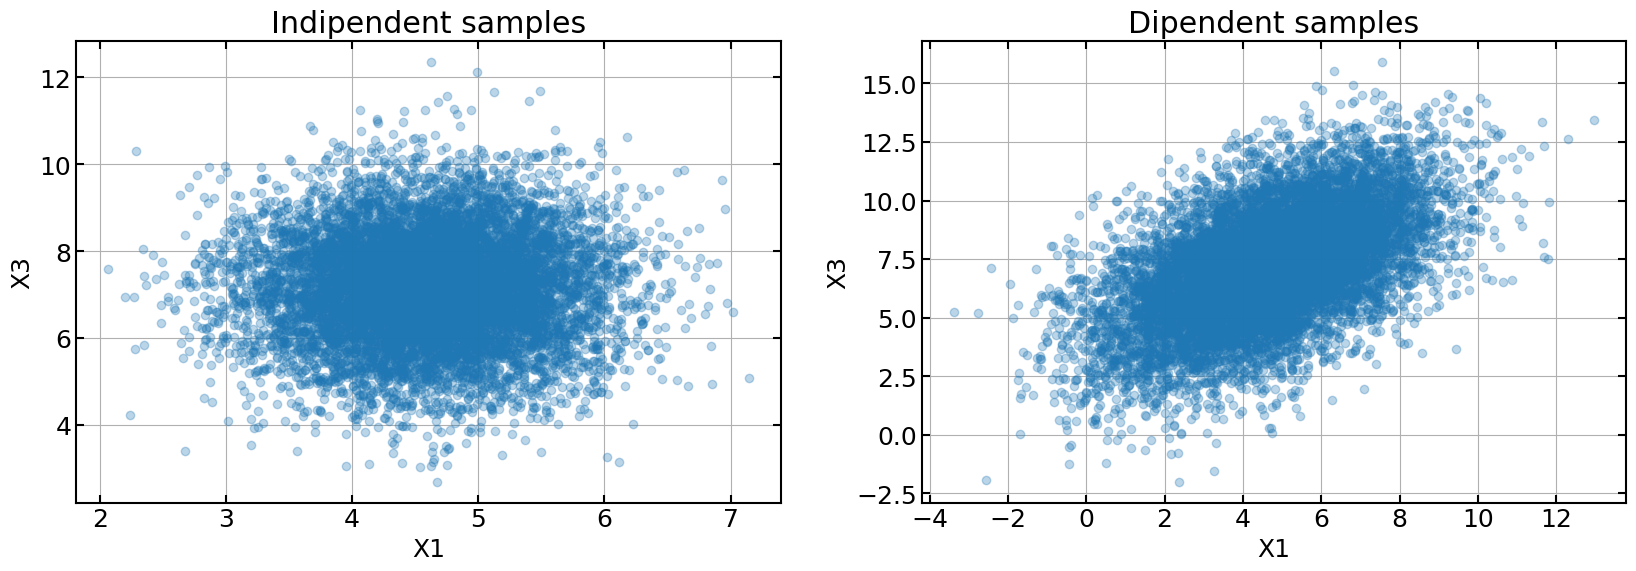

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))
axs[0].plot(samples[:,0], samples[:,2],'o', alpha = 0.3)
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X3')
axs[0].set_title('Indipendent samples')
axs[0].grid(True)
axs[1].plot(samples_[:,0], samples_[:,2],'o', alpha = 0.3)
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X3')
axs[1].set_title('Dipendent samples')
axs[1].grid(True)

Gaussian distributions have the nice algebraic property of being closed under conditioning and marginalization. Being closed under conditioning and marginalization means that the resulting distributions from these operations are also Gaussian, which makes many problems in statistics and machine learning tractable. Let's consider X, Y sumbsample of the general distribution of the random variables.

$P_{X|Y} =
\begin{bmatrix}
X \\
Y
\end{bmatrix}
 ≈ \mathrm{N}(\begin{bmatrix}
\mu_{X} \\
\mu_{Y}
\end{bmatrix},\begin{bmatrix}
\Sigma_{X,X}, \Sigma_{X,Y} \\
\Sigma_{Y,X}, \Sigma_{Y,Y}
\end{bmatrix})$

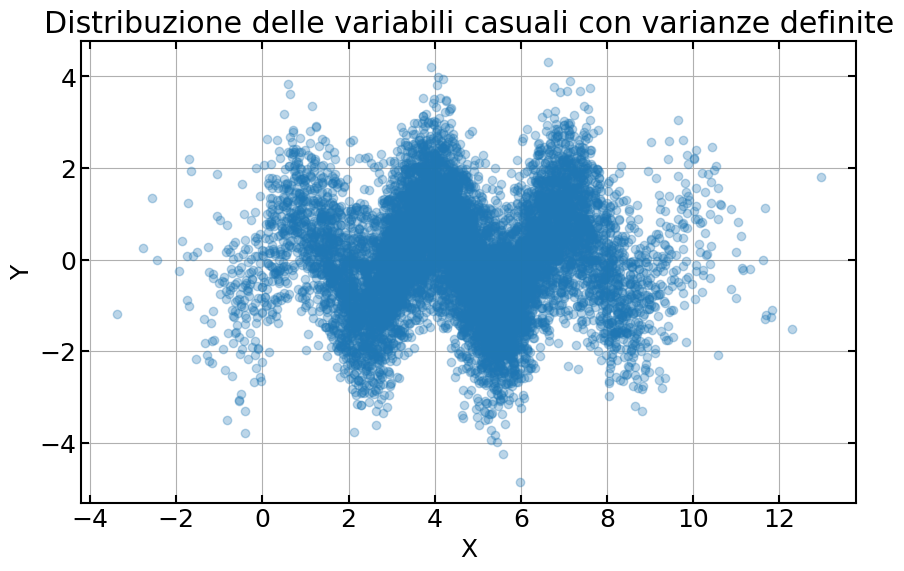

In [ ]:
# Visualizzazione
Y = np.sin(2 * samples_[:,0])+ np.random.normal(0, 1, len(samples_[:,0]))  # con rumore
plt.figure(figsize=(10, 6))
plt.plot(samples_[:,0],Y,'o', alpha= 0.3)
plt.title('Distribuzione delle variabili casuali con varianze definite')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

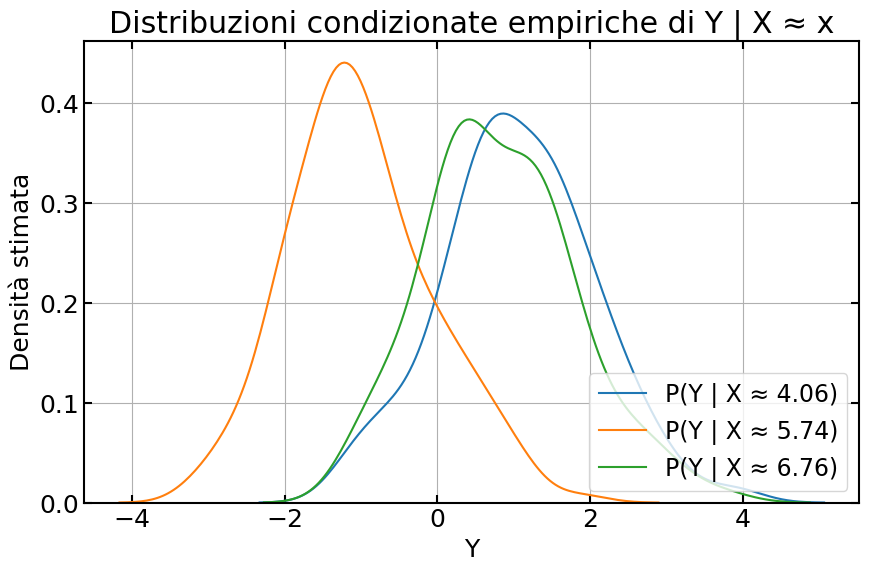

In [ ]:
import pandas as pd
import seaborn as sns

# 2. Mettiamo tutto in un DataFrame per facilitare il filtro
df = pd.DataFrame({'X': samples_[:,0], 'Y': Y})

# 3. Selezioniamo dei valori di X su cui condizionare
x_vals = [samples_[0,0],samples_[100,0],samples_[5,0]]
tolerance = 0.05  # finestra per condizionare

# 4. Plot
plt.figure(figsize=(10, 6))

for x0 in x_vals:
    # Seleziona Y tali che X ≈ x0
    cond_Y = df[np.abs(df['X'] - x0) < tolerance]['Y']
    sns.kdeplot(cond_Y, label=f'P(Y | X ≈ {np.round(x0,2)})')

plt.title('Distribuzioni condizionate empiriche di Y | X ≈ x')
plt.xlabel('Y')
plt.ylabel('Densità stimata')
plt.legend(loc=4)
plt.grid(True)
plt.show()

Now, let's consider the following observations:
$$
Y = f(X) + ϵ, ~~ϵ ≈ N(0, σ)
$$

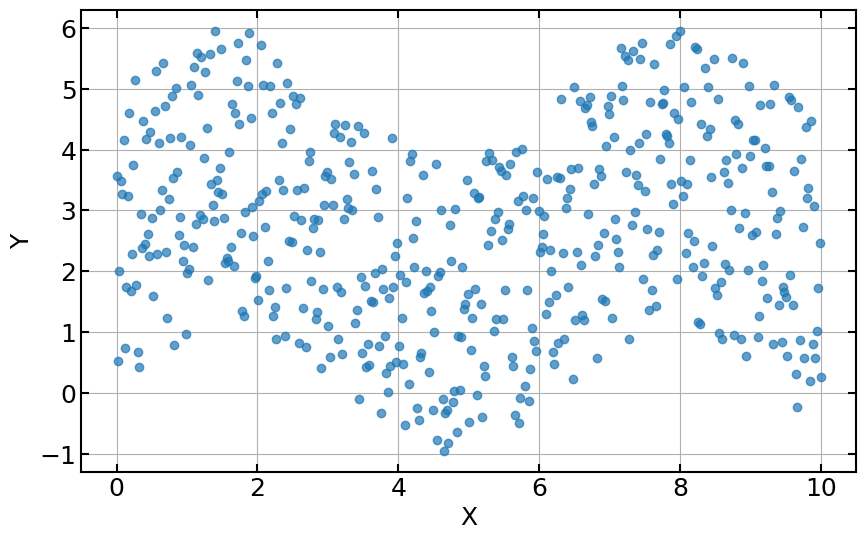

In [ ]:
X = np.linspace(0, 10, 500)
Y = np.sin(X) + np.random.random(len(X))*5
plt.figure(figsize=(10,6))
plt.plot(X,Y,'o', alpha = 0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

For "real" observation like this, the joint distribution has to be modified, adding the contribution of the uncertainties:
$P_{X|Y} =
\begin{bmatrix}
X \\
Y
\end{bmatrix}
 ≈ \mathrm{N}(\begin{bmatrix}
\mu_{X} \\
\mu_{Y}
\end{bmatrix},\begin{bmatrix}
\Sigma_{X,X}, \Sigma_{X,Y} \\
\Sigma_{Y,X}, \Sigma_{Y,Y}+ψ^2I
\end{bmatrix})$

Now, the goal of Gaussian processes is to learn this underlying distribution from training data. Respective to the test data X, we will denote the training data as Y.
**The key idea of Gaussian processes is to model the underlying distribution of X together with Y as a multivariate normal distribution.**
That means that the joint probability distribution $P_{X,Y​}$ spans the space of possible function values for the function that we want to predict. Please note that this joint distribution of test and training data has $|X|+|Y|$ $dimensions.

In order to perform regression on the training data, we will treat this problem as Bayesian inference. The essential idea of Bayesian inference is to update the current hypothesis as new information becomes available. In the case of Gaussian processes, this information is the training data. Thus, we are interested in the conditional probability $P_{X|Y}$​. Finally, we recall that Gaussian distributions are closed under conditioning so $P_{X|Y}$ is also distributed normally.

**How do we set up this distribution and define the mean μ and the covariance matrix Σ?**

The covariance matrix will not only describe the shape of our distribution, but ultimately determines the characteristics of the function that we want to predict. The covariance matrix will not only describe the shape of our distribution, but ultimately determines the characteristics of the function that we want to predict.

![](https://drive.google.com/uc?export=view&id=1oP1_fEtQ1yC1tKSGISTRQ3Pk7w1J7XlS)

We generate the covariance matrix by evaluating the kernel $k$, which is often also called covariance function, pairwise on all the points.

$$
k: \mathbb{R}^n\times \mathbb{R}^n\rightarrow \mathbb{R}
$$

thus, considering t, t' ∈ $\mathbb{R}^n$, $Σ = Cov(X,X')=k(t,t')$, where X, X' are two random variables.

In [ ]:
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared
from ipywidgets import interact, FloatSlider, Dropdown

# Punti su cui calcolare la matrice di covarianza
n = 50
x = np.linspace(0, 5, n).reshape(-1, 1)

def plot_covariance(kernel_type, length_scale=1.0, nu=1.5, periodicity=1.0):
    if kernel_type == 'RBF':
        kernel = RBF(length_scale=length_scale)
    elif kernel_type == 'Matérn':
        kernel = Matern(length_scale=length_scale, nu=nu)
    elif kernel_type == 'Periodic':
        kernel = ExpSineSquared(length_scale=length_scale, periodicity=periodicity)
    else:
        raise ValueError("Kernel non riconosciuto.")

    K = kernel(x, x)

    # Plot della heatmap
    plt.figure(figsize=(6, 5))
    plt.imshow(K, extent=[0, 5, 5, 0], cmap='viridis')
    plt.title(f"Kernel: {kernel_type}\nParametri: {kernel}")
    plt.xlabel("x")
    plt.ylabel("x'")
    plt.colorbar(label='k(x, x\')')
    plt.tight_layout()
    plt.show()

# Widget interattivo
interact(
    plot_covariance,
    kernel_type=Dropdown(options=['RBF', 'Matérn', 'Periodic'], value='RBF', description='Kernel'),
    length_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Length scale'),
    nu=FloatSlider(min=0.5, max=3.0, step=0.5, value=1.5, description='ν (Matérn)'),
    periodicity=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Periodicity'),
);


interactive(children=(Dropdown(description='Kernel', options=('RBF', 'Matérn', 'Periodic'), value='RBF'), Floa…

we could obtain a prediction for our function values by sampling from this distribution. But, since sampling involves randomness, the resulting fit to the data would not be deterministic and our prediction could end up being an outlier. In order to make a more meaningful prediction we can use the other basic operation of Gaussian distributions.

Through the marginalization of each random variable, we can extract the respective mean function value $μ'_i$ and standard deviation $σ'_i=Σ_{ii}$ for the i-th test point. In contrast to the prior distribution, where we set the mean to μ = 0, the result of conditioning the joint distribution of test and training data will most likely have a non-zero mean
μ'≠ 0. Extracting μ' and σ' does not only lead to a more meaningful prediction, it also allows us to make a statement about the confidence of the prediction.

In [ ]:
def rbf_kernel(X1, X2, length_scale=1.0, sigma_f=1.0):
    """Radial Basis Function (RBF) kernel."""
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

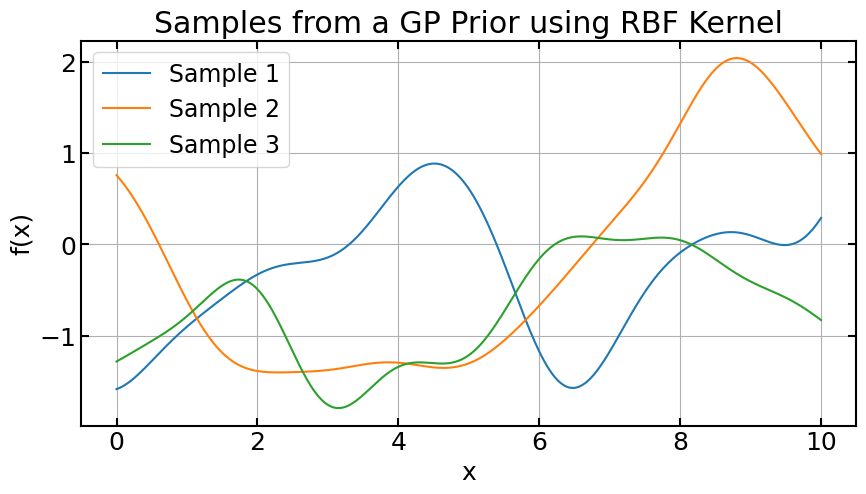

In [ ]:
# Matrice di covarianza
K = rbf_kernel(X.reshape(-1,1), X.reshape(-1,1), length_scale=1.0, sigma_f=1.0)

# Campioni dal prior GP
np.random.seed(42)
samples = np.random.multivariate_normal(mean=np.zeros(X.reshape(-1,1).shape[0]), cov=K, size=3)

# Plot dei campioni
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(X, samples[i], label=f"Sample {i+1}")
plt.title("Samples from a GP Prior using RBF Kernel")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


So the final goal is to derive the hyperparameters of the kernel through which we can derive the best fit function among all the available function generated by the kernel itself. Generally the problem can be set as following:
$$
f_{unk} = X^Tw → y_{dat} = f_{GP}(X)+ϵ
$$


$$
P(y_{dat}|f_{GP}(X)) = P(y_{dat}|X, θ_{GP})≈ \frac{1}{det(K)} e^{-(y_{dat}-μ_{GP})^TK_{ϵ}^{-1}(y_{dat}-μ_{GP})}
$$


If we consider the logarithm:
$$
log P(y_{dat}|f_{GP}(X)) ≈ -(y_{dat}-μ_{GP})^TK_{ϵ}^{-1}(y_{dat}-μ_{GP})-logK_{ϵ}
$$

which will be the object function to minimize!!!

In [ ]:
def log_marginal_likelihood(X_train, y_train, length_scale, variance, noise):
    """
    Compute the log-marginal likelihood for a GP with RBF kernel.

    Parameters
    ----------
    X_train : ndarray of shape (n_samples, n_features)
    y_train : ndarray of shape (n_samples,)
    length_scale : float
    variance : float
    noise : float

    Returns
    -------
    log_marginal_likelihood : float
    """
    # Compute the covariance matrix K
    K = rbf_kernel(X_train, X_train, length_scale, variance)
    K += noise**2 * np.eye(len(X_train))  # Add noise term

    try:
        # Cholesky decomposition
        L = cholesky(K, lower=True)
    except LinAlgError:
        return -np.inf  # Numerical instability

    # Solve for alpha = K^-1 y using Cholesky
    alpha = cho_solve((L, True), y_train)

    # Compute log marginal likelihood
    log_likelihood = -0.5 * y_train @ alpha
    log_likelihood -= np.sum(np.log(np.diag(L)))
    log_likelihood -= 0.5 * len(X_train) * np.log(2 * np.pi)

    return log_likelihood

In [ ]:
from scipy.linalg import cholesky, cho_solve
# Parametri kernel
length_scale = 1.0
variance = 1.0
alpha_noise = 1e-5  # Rumore numerico per la stabilità

# Costruisci la matrice di covarianza
K = rbf_kernel(X.reshape(-1,1), X.reshape(-1,1), length_scale=length_scale, sigma_f=variance)
K[np.diag_indices_from(K)] += alpha_noise  # aggiungi rumore al diagonale

# Decomposizione di Cholesky: K = L @ L.T
try:
    L = cholesky(K, lower=True, check_finite=False)
except np.linalg.LinAlgError:
    raise ValueError("K non è definita positiva. Prova a usare un alpha maggiore.")

# Calcola alpha = (K)^-1 y usando la Cholesky
alpha = cho_solve((L, True), Y.reshape(-1,1), check_finite=False)

# Calcola log |K| = 2 * somma dei log dei termini diagonali di L
log_det_K = 2.0 * np.sum(np.log(np.diag(L)))

# Calcola log-marginal likelihood
n = X.shape[0]
lml = -0.5 * np.dot(Y, alpha) - 0.5 * log_det_K - 0.5 * n * np.log(2 * np.pi)

print(f"Log-marginal likelihood: {lml}")

Log-marginal likelihood: [-48084821.59896772]


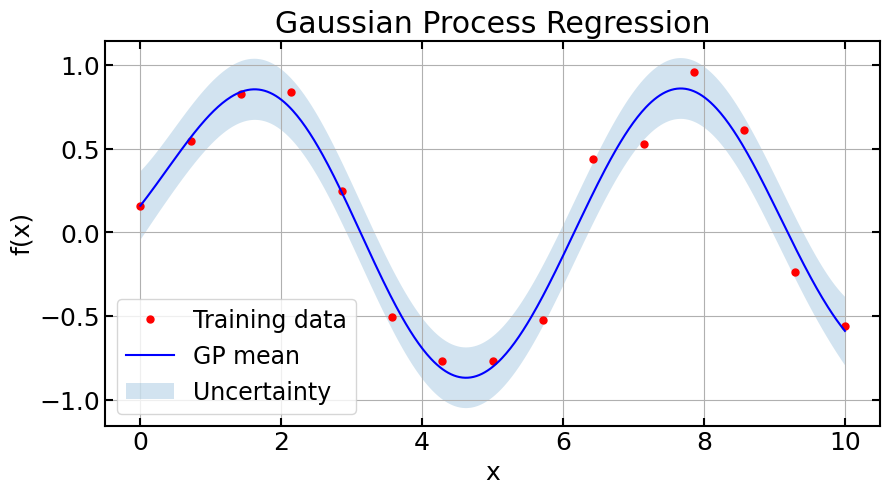

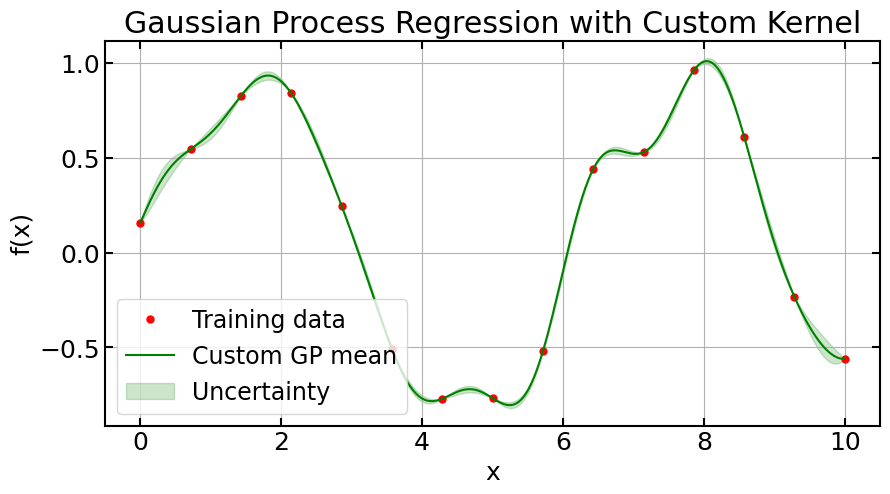

In [ ]:

## Parte 2: Gaussian Process Regression

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Dati di training sintetici
X_train = np.atleast_2d(np.linspace(0, 10, 15)).T
y_train = np.sin(X_train).ravel() + 0.2 * np.random.randn(X_train.shape[0])

# Definizione del kernel (RBF + WhiteKernel per il rumore)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.2)

# Fit del modello GP
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X_train, y_train)

# Predizione
X_pred = np.linspace(0, 10, 500).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plot della regressione GP
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, 'r.', markersize=10, label='Training data')
plt.plot(X_pred, y_pred, 'b-', label='GP mean')
plt.fill_between(X_pred.ravel(), y_pred - sigma, y_pred + sigma, alpha=0.2, label='Uncertainty')
plt.title("Gaussian Process Regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Parte 3 (opzionale): Variazione del kernel manuale

# Esempio: kernel periodico + RBF
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel_custom = RBF(length_scale=1.0) + ExpSineSquared(length_scale=1.0, periodicity=3.0)
gp_custom = GaussianProcessRegressor(kernel=kernel_custom)
gp_custom.fit(X_train, y_train)

y_pred_custom, sigma_custom = gp_custom.predict(X_pred, return_std=True)

plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, 'r.', markersize=10, label='Training data')
plt.plot(X_pred, y_pred_custom, 'g-', label='Custom GP mean')
plt.fill_between(X_pred.ravel(), y_pred_custom - sigma_custom, y_pred_custom + sigma_custom, alpha=0.2, color='green', label='Uncertainty')
plt.title("Gaussian Process Regression with Custom Kernel")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()